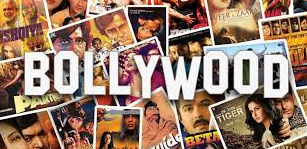

**1. Loading necessary libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV

**2.Loading dataset**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/PROJECTS/MovieRatingPrediction/IMDb Movies India.csv',encoding='ISO-8859-1')
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


**3.EDA**

In [ ]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [ ]:
top_10_movies = df[['Name', 'Rating']].sort_values(by='Rating', ascending=False).head(10)
print(top_10_movies)

                      Name  Rating
8339       Love Qubool Hai    10.0
5410            Half Songs     9.7
2563                 Breed     9.6
11704             Ram-Path     9.4
14222  The Reluctant Crime     9.4
6852                  June     9.4
5077          Gho Gho Rani     9.4
1314          Ashok Vatika     9.3
5125           God of gods     9.3
12673   Secrets of Sinauli     9.3


In [ ]:
df['Director'].value_counts()

,count
Director,
Jayant Desai,58
Kanti Shah,57
Babubhai Mistry,50
Mahesh Bhatt,48
Master Bhagwan,47
...,...
Naeem Siddiqui,1
Shadaab Khan,1
Mystelle Brabbee,1


Genre
Documentary    7.613287
News           7.250000
Biography      6.819718
History        6.804688
Sport          6.494118
Family         6.195173
Musical        6.156627
Music          6.137705
War            6.041176
Drama          5.998558
Name: Rating, dtype: float64


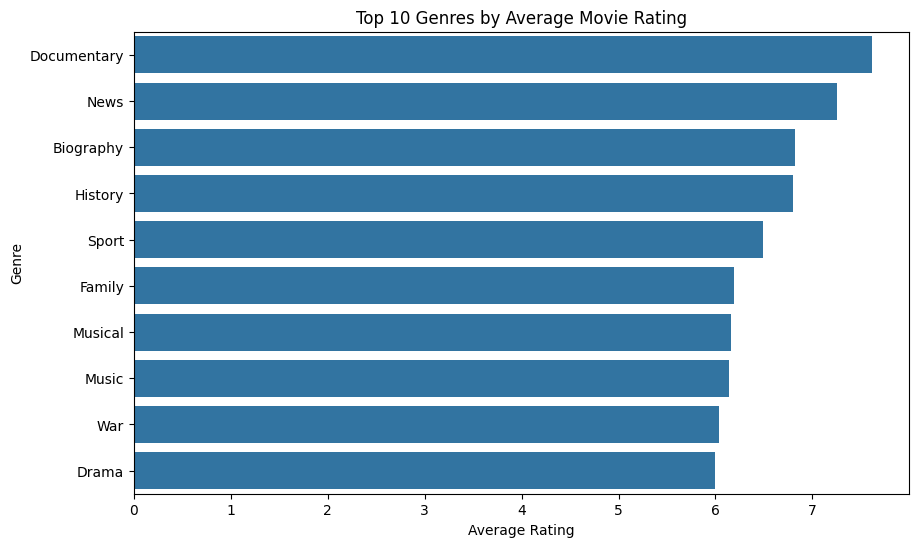

In [ ]:
df['Genre'] = df['Genre'].str.split(',')
df_exploded = df.explode('Genre')
df_exploded['Genre'] = df_exploded['Genre'].str.strip()
genre_ratings = df_exploded.groupby('Genre')['Rating'].mean().sort_values(ascending=False)
print(genre_ratings.head(10))
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_ratings.values[:10], y=genre_ratings.index[:10])
plt.title('Top 10 Genres by Average Movie Rating')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()


Year
(1948)    7.073684
(1950)    7.061290
(1940)    6.954545
(1952)    6.848148
(1953)    6.820690
(1955)    6.794737
(1957)    6.763462
(1951)    6.712500
(1917)    6.700000
(2021)    6.625641
Name: Rating, dtype: float64


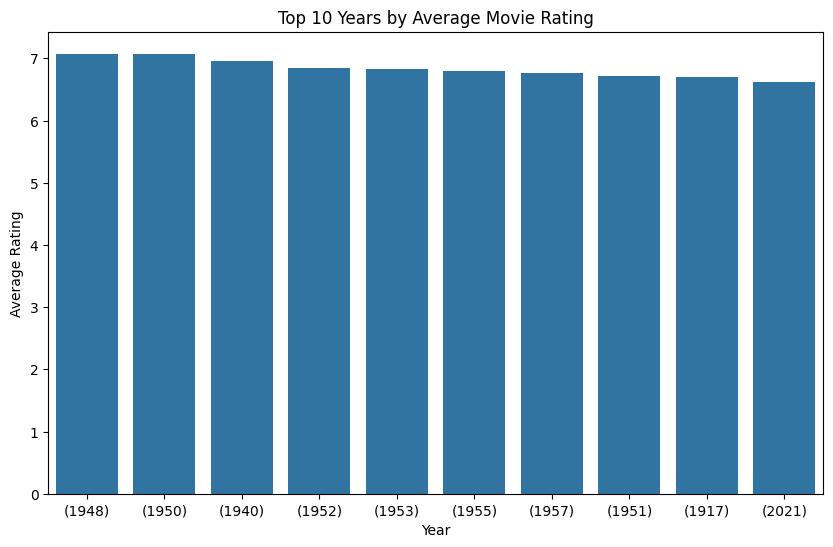

In [ ]:
yearly_ratings = df.groupby('Year')['Rating'].mean()
top_10_years = yearly_ratings.sort_values(ascending=False).head(10)
print(top_10_years)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_years.index, y=top_10_years.values)
plt.title('Top 10 Years by Average Movie Rating')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()


**4. Handling missing values**

In [ ]:
df.isna().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [ ]:
Labels=['Year','Duration','Rating','Votes']
for label in Labels:
        df[label] = df[label].fillna(df[label].mode()[0])

In [ ]:
Features=['Genre','Director','Actor 1','Actor 2','Actor 3']
for feature in Features:
  df[feature]=df[feature].fillna(method='ffill')

<ipython-input-65-ba63c3cd3c4c>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[feature]=df[feature].fillna(method='ffill')


In [ ]:
df.isna().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


**4. Changing datatypes to numeric**

In [ ]:
df.dtypes

,0
Name,object
Year,object
Duration,object
Genre,object
Rating,float64
Votes,object
Director,object
Actor 1,object
Actor 2,object
Actor 3,object


In [ ]:
df['Genre'] = df['Genre'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

In [ ]:
features=['Name','Year','Duration','Genre','Votes','Director','Actor 1','Actor 2','Actor 3']
encoder=LabelEncoder()
for feature in features:
  df[feature]=encoder.fit_transform(df[feature])
df.dtypes

,0
Name,int64
Year,int64
Duration,int64
Genre,int64
Rating,float64
Votes,int64
Director,int64
Actor 1,int64
Actor 2,int64
Actor 3,int64


**5. Separating features and target**

In [ ]:
X = df.drop('Rating', axis=1)
y=df['Rating']

In [ ]:
X

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
0,0,98,20,299,1849,1926,2250,800,3108
1,1,98,9,299,1849,1548,3280,4790,527
2,2,100,172,351,1849,5123,3713,2866,3450
3,3,98,10,228,1169,3319,2917,1504,4020
4,7,89,5,299,1849,385,3112,3462,405
...,...,...,...,...,...,...,...,...,...
15504,13832,67,20,0,368,2690,2586,4299,4262
15505,13834,78,29,40,1687,2499,227,4532,519
15506,13835,84,20,0,1849,2424,3609,4532,519
15507,13836,67,20,0,1849,2424,3609,4532,519


In [ ]:
y

,Rating
0,6.2
1,7.0
2,6.2
3,4.4
4,6.2
...,...
15504,4.6
15505,4.5
15506,6.2
15507,6.2


**6. Splitting data for training and testing**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=1)

**7. Model building**

In [ ]:
dec=DecisionTreeRegressor()
rf=RandomForestRegressor()
ab=AdaBoostRegressor()
gb=GradientBoostingRegressor()
sv=SVR()
xg=XGBRegressor()

In [ ]:
models=[dec,rf,ab,gb,sv,xg]
for model in models:
  print(model)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print('r2_score:',r2_score(y_test,y_pred))
  print('mean error:',mean_absolute_error(y_test,y_pred))
  print('squared error:',mean_squared_error(y_test,y_pred))

DecisionTreeRegressor()
r2_score: -0.5360936397798775
mean error: 0.6792821835375079
squared error: 1.5011111111111115
RandomForestRegressor()
r2_score: 0.19063281364801865
mean error: 0.5074474532559643
squared error: 0.7909349045776918
AdaBoostRegressor()
r2_score: 0.024502880820687634
mean error: 0.7120329440047048
squared error: 0.9532814449168506
GradientBoostingRegressor()
r2_score: 0.21252275588797132
mean error: 0.532014606972852
squared error: 0.7695434772147857
SVR()
r2_score: 0.018402213912240173
mean error: 0.5776238396974624
squared error: 0.9592431770953463
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
      

**6. Finalizing the model**

In [ ]:
dec=DecisionTreeRegressor()
dec.fit(X_train2,y_train2)

DecisionTreeRegressor()

In [ ]:
y_pred=dec.predict(X_test2)
print('r2_score:',r2_score(y_test2,y_pred))
print('mean error:',mean_absolute_error(y_test2,y_pred))
print('squared error:',mean_squared_error(y_test2,y_pred))

r2_score: -0.5519611261622146
mean error: 0.6885020416935362
squared error: 1.5166172361917045
